In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelextrema

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# define ODE model
def goodwin (x0,t,parameters):
    # parameters
    p1 = parameters['p1'] #production rate of x
    p2 = parameters['p2'] #production rate of y
    p3 = parameters['p3'] #production rate of z
    d1 = parameters['d1'] #degradation rate of x
    d2 = parameters['d2'] #degradation rate of y
    d3 = parameters['d3'] #degradation rate of z
    K = parameters['K'] #EC50 for the Hill curve
    h = parameters['h'] #Hill exponent
    # variables
    x = x0[0]
    y = x0[1]
    z = x0[2]
    # ODEs
    dxdt = p1* K**h / (K**h + z**h) - d1*x
    dydt = p2*x - d2*y
    dzdt = p3*y - d3*z
    return [dxdt, dydt, dzdt]

In [3]:
def goodwin_plot(h=6, d1=0.2, d2=0.15, d3=0.1):
    
    # define time, initial conditions and parameters for integration
    t = np.arange(0, 450, 0.01)
    x0 = [0.1, 0.1, 0.1]
    parameters = {'p1':1, 'p2':1, 'p3':1, 'd1':d1, 'd2':d2, 'd3':d3,'K':1,  'h':h}
    
    # solve ODE model
    sol = odeint(goodwin, x0, t, args=(parameters,))
    x = sol[:,0] 
    y = sol[:,1] 
    z = sol[:,2] 

    # plot solution 
    # subplot 1: time series
    fig1 = plt.figure(figsize=(11,5))

    ax1 = fig1.add_subplot(121)
    ax1.plot(t, x, label='x')
    ax1.plot(t, y, label='y')
    ax1.plot(t, z, label='z')
    ax1.legend()
    ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
    ax1.set_title('time series')
    ax1.grid()

    # subplot 2: phase space 
    ax1 = fig1.add_subplot(122)
    ax1.plot(x, y)
    ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
    ax1.set_title('phase space')
    fig1.suptitle('Goodwin model for Hill coeff. h={}'.format(parameters['h']))
    
widget = interactive(goodwin_plot, h=6, d1=0.2, d2=0.15, d3=0.1)
display(widget)

interactive(children=(IntSlider(value=6, description='h', max=18, min=-6), FloatSlider(value=0.2, description=…

What does the Hill coefficient h control?\
Is the point of change affected by the choice of d1, d2, d3? Let's change these parameters and see.

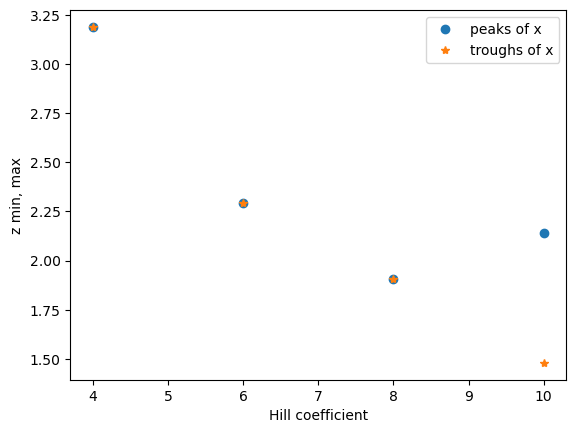

In [4]:
# Hopf bifurcation
# ----------------
# find peaks and troughs for n=4, 6, 8, 10 
hill_values = np.array([4,6,8,10])
dt = .1
x0 = [0.1, 0.1, 0.1]
t = np.arange(0, 10000, dt)

parameters = {'p1':1, 'p2':1, 'p3':1,'d1':0.2, 'd2':0.15, 'd3':0.1,'K':1,  'h':6}

peaks_z, troughs_z = [], [] #empty lists to store results
for h in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = h

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, x0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    
    #print(max_z, min_z)

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)

# plot results: peaks and troughs of x vs Hill coefficients
fig6 = plt.figure()
ax1 = fig6.add_subplot(111)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of x')
ax1.plot(hill_values, troughs_z, '*', label='troughs of x')
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')
ax1.legend()



Text(0, 0.5, 'z min, max')

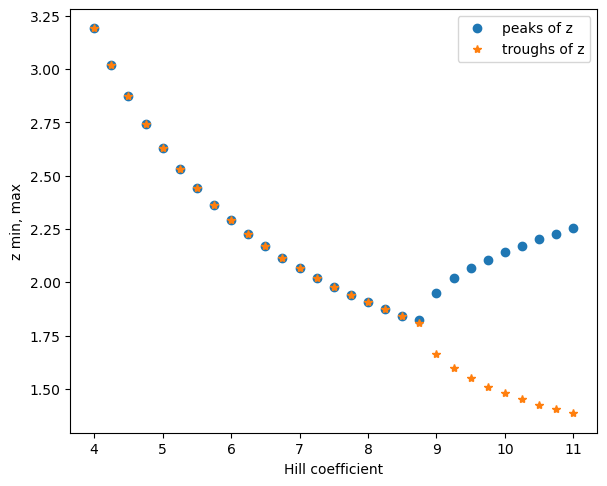

In [5]:
# now do the same but increasing the Hill coefficient by steps of 0.25
hill_values = np.arange(4, 11.25, 0.25)
t = np.arange(0, 10000, dt)

peaks_z, troughs_z = [], [] #empty lists to store results
for h in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = h

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, x0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    # --------------------------------
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)

# plot results: peaks and troughs of x vs Hill coefficients
fig7 = plt.figure(figsize=(6.8,5.5))
ax1 = fig7.add_subplot(111)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of z')
ax1.plot(hill_values, troughs_z, '*', label='troughs of z')
ax1.legend()
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')
